Customer lifetime value is the total monetary value of the transactions/purchases made by a customer with your businesss <br>
over his/her entire lifetinme

In [1]:
#covention for libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #This is to remove warnings

In [2]:
df1= pd.read_csv('olist_customers_dataset.csv', low_memory= False)
df2= pd.read_csv('olist_orders_dataset.csv', low_memory= False, parse_dates=['order_purchase_timestamp'])
df4= pd.read_csv('olist_order_items_dataset.csv', low_memory= False)
df5= pd.read_csv('olist_order_payments_dataset.csv', low_memory= False)

In [3]:
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
df3= pd.merge(df1,df2 , how = 'inner', on = 'customer_id')
df3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [6]:
df6= pd.merge(df4,df5 , how = 'inner', on = 'order_id')
df6.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04


In [7]:
#its happen that there no missing values
df3.isnull().sum().head(7)

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_id                    0
order_status                0
dtype: int64

In [8]:
df6.isnull().sum().head(7)

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [9]:
df3.drop(['order_id','customer_id', 'order_status','customer_unique_id'] , axis=1,inplace = True)
df6.drop(['order_id','seller_id', 'order_item_id','product_id'] , axis=1,inplace = True)

In [10]:
df3.head()

,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,14409,franca,SP,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,9790,sao bernardo do campo,SP,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,1151,sao paulo,SP,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,8775,mogi das cruzes,SP,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,13056,campinas,SP,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [11]:
df6.head()

,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04


In [12]:
df7= df3.join(df6)

In [13]:
df7.head()

,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,14409,franca,SP,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,9790,sao bernardo do campo,SP,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,1151,sao paulo,SP,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,8775,mogi das cruzes,SP,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,13056,campinas,SP,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04


In [14]:
df7.isnull().sum()

customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [15]:
#Let's check for any irregularities not captured by the isna/isnull function
count_na = 0
for values in df3.values.tolist():
    for value in values:
        if value == '?':
            count_na += 1
        else:
            continue
#Print the result
print('We have {} missing values not captured by isna/isnull command'.format(count_na))

We have 0 missing values not captured by isna/isnull command


In [16]:
df7.drop(['order_delivered_carrier_date','order_delivered_customer_date',] ,axis=1, inplace = True)

In [17]:
df7.drop('order_approved_at', axis=1, inplace = True)

In [18]:
# find total duplicate entries and drop them if any
print(f'total duplicate rows: {df7.duplicated().sum()}')

# drop duplicate rows if any
data= df7[~df7.duplicated()]
data.shape

total duplicate rows: 0


(99441, 12)

In [19]:
data.head()

,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,order_estimated_delivery_date,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,14409,franca,SP,2017-05-16 15:05:35,2017-06-05 00:00:00,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,9790,sao bernardo do campo,SP,2018-01-12 20:48:24,2018-02-06 00:00:00,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,1151,sao paulo,SP,2018-05-19 16:07:45,2018-06-13 00:00:00,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,8775,mogi das cruzes,SP,2018-03-13 16:06:38,2018-04-10 00:00:00,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,13056,campinas,SP,2018-07-29 09:51:30,2018-08-15 00:00:00,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04


In [22]:
data.nunique()

customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
order_purchase_timestamp         98875
order_estimated_delivery_date      459
shipping_limit_date              79519
price                             5545
freight_value                     6644
payment_sequential                  26
payment_type                         4
payment_installments                23
payment_value                    26844
dtype: int64

EDA and feature selection on the data

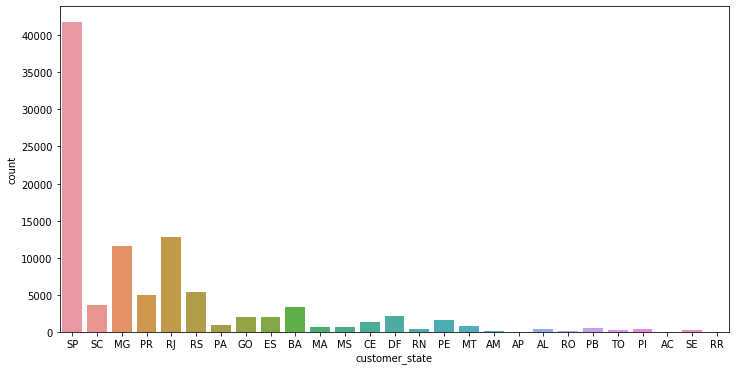

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'customer_state', data= data)

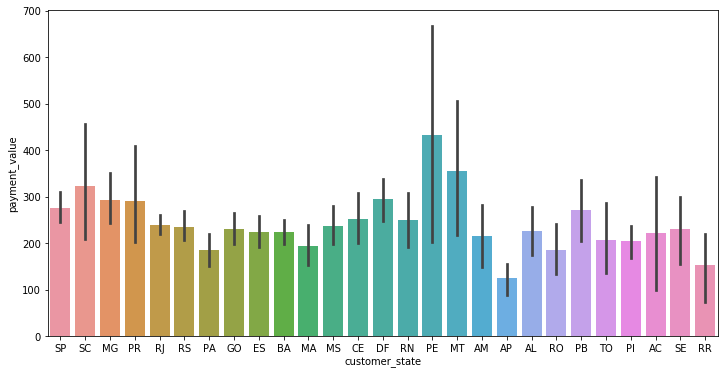

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'customer_state',y= 'payment_value', estimator= np.std, data= data)

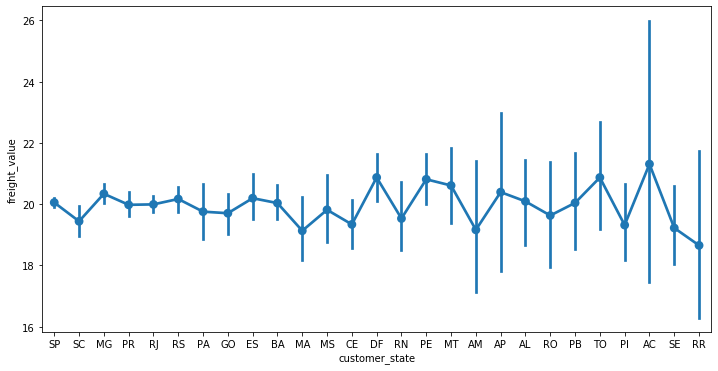

In [25]:
plt.figure(figsize=(12,6))
sns.pointplot(x= 'customer_state',y ='freight_value' ,data= data)

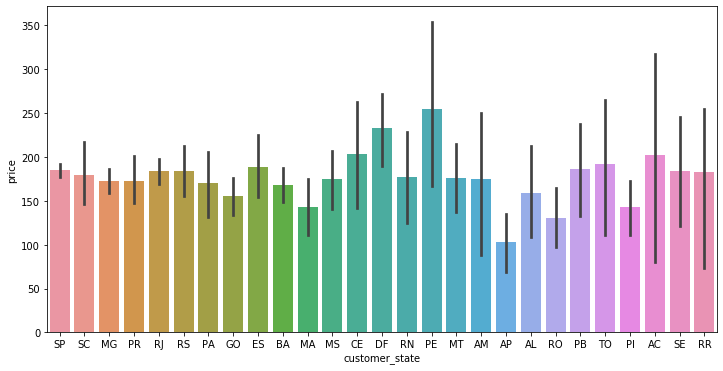

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'customer_state',y ='price' ,data= data, estimator= np.std)

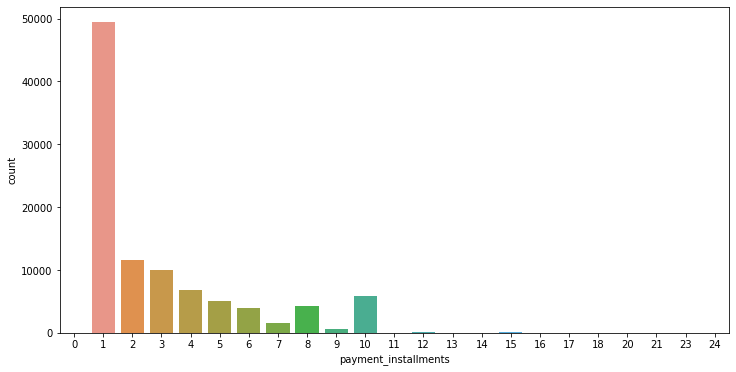

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'payment_installments', data= data)

<Figure size 864x432 with 0 Axes>

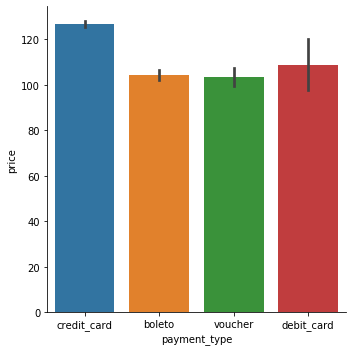

In [28]:
plt.figure(figsize=(12,6))
sns.factorplot(x= 'payment_type',y ='price' ,data= data, kind= 'bar')

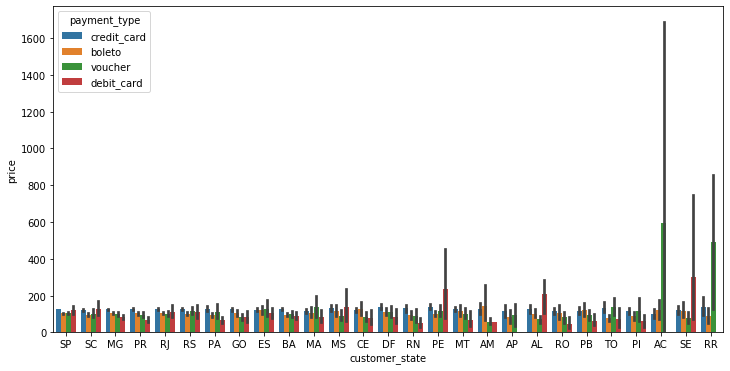

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'customer_state',y ='price', hue= 'payment_type' ,data= data)

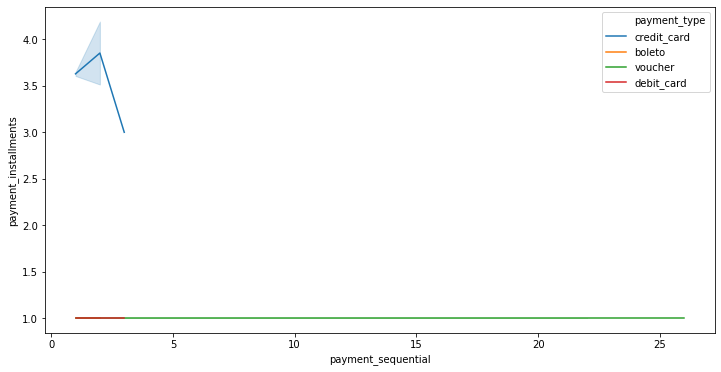

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(x= 'payment_sequential',y ='payment_installments', hue= 'payment_type' ,data= data,color= 'red')

<Figure size 864x432 with 0 Axes>

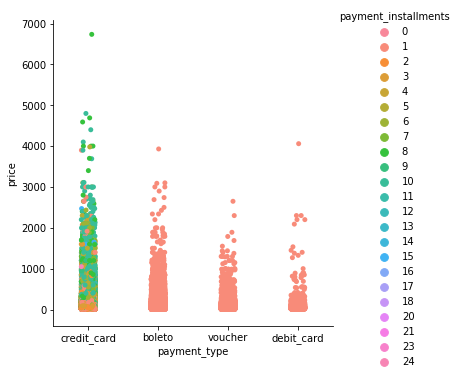

In [30]:
plt.figure(figsize=(12,6))
sns.catplot(x= 'payment_type',y ='price' ,hue= 'payment_installments', data= data)

In [35]:
data.columns

Index(['customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_purchase_timestamp', 'order_estimated_delivery_date',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
      dtype='object')

In [37]:
features=['customer_zip_code_prefix', 'order_purchase_timestamp','freight_value' ,'price' ]
data_clv= data[features]
data_clv['Totalsales']= data_clv['freight_value'].multiply(data_clv['price'])
data_clv.head()

,customer_zip_code_prefix,order_purchase_timestamp,freight_value,price,Totalsales
0,14409,2017-05-16 15:05:35,13.29,58.90,782.7810
1,9790,2018-01-12 20:48:24,19.93,239.90,4781.2070
2,1151,2018-05-19 16:07:45,17.87,199.00,3556.1300
3,8775,2018-03-13 16:06:38,12.79,12.99,166.1421
4,13056,2018-07-29 09:51:30,18.14,199.90,3626.1860


In [38]:
maxdate= data_clv['order_purchase_timestamp'].dt.date.max()
mindate= data_clv['order_purchase_timestamp'].dt.date.min()
unique_code_prefix = data_clv['customer_zip_code_prefix'].nunique()
tot_freight_value= data['freight_value'].sum()
tot_price= data_clv['price'].sum()

print(f'the total timestamp is:{mindate} to {maxdate}')
print(f'the total_no of unique customer_zip_code is:{unique_code_prefix}')
print(f'the total frieght_value is:{tot_freight_value} ')
print(f'the total price of sales is:{tot_price} ')

the total timestamp is:2016-09-04 to 2018-10-17
the total_no of unique customer_zip_code is:14994
the total frieght_value is:1994702.5699999998 
the total price of sales is:12010408.040000001 


In [39]:
data_clv.describe(), data_clv.shape

(       customer_zip_code_prefix  freight_value         price    Totalsales
 count              99441.000000   99441.000000  99441.000000  9.944100e+04
 mean               35137.474583      20.059156    120.779236  3.617679e+03
 std                29797.938996      15.963449    183.134522  1.550465e+04
 min                 1003.000000       0.000000      0.850000  0.000000e+00
 25%                11347.000000      13.080000     39.900000  5.474690e+02
 50%                24416.000000      16.310000     74.900000  1.184882e+03
 75%                58900.000000      21.200000    134.900000  2.705040e+03
 max                99990.000000     409.680000   6735.000000  1.308678e+06,
 (99441, 5))

In [40]:
data_clv= data_clv[data_clv['Totalsales']>0]
data_clv.describe()

,customer_zip_code_prefix,freight_value,price,Totalsales
count,99111.000000,99111.000000,99111.000000,9.911100e+04
mean,35134.279596,20.125945,120.854784,3.629725e+03
std,29797.842344,15.947915,183.411167,1.552904e+04
min,1003.000000,0.010000,0.850000,2.844000e-01
25%,11347.000000,13.110000,39.900000,5.513345e+02
50%,24415.000000,16.320000,74.900000,1.188810e+03
75%,58884.000000,21.230000,134.900000,2.710260e+03
max,99990.000000,409.680000,6735.000000,1.308678e+06


In [41]:
data_clv.isnull().sum()

customer_zip_code_prefix    0
order_purchase_timestamp    0
freight_value               0
price                       0
Totalsales                  0
dtype: int64

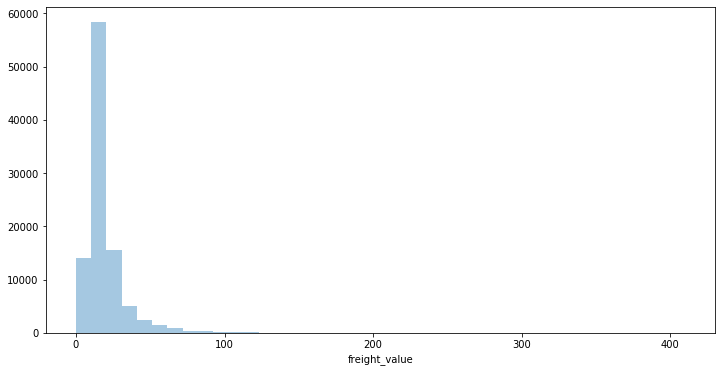

In [42]:
plt.figure(figsize=(12,6))
sns.distplot(data_clv ['freight_value'], kde= False, bins = 40)

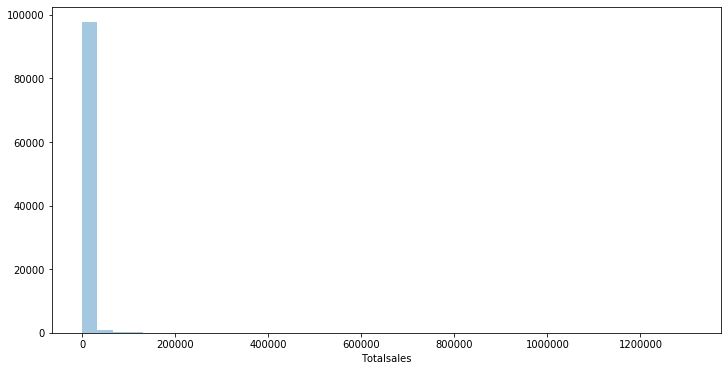

In [44]:
plt.figure(figsize=(12,6))
sns.distplot(data_clv ['Totalsales'], kde= False, bins = 40)

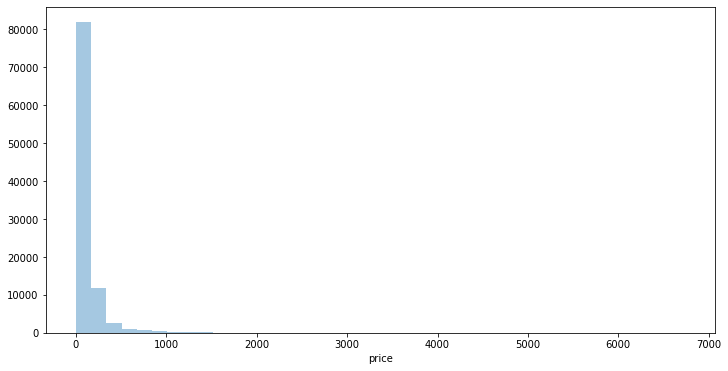

In [45]:
plt.figure(figsize=(12,6))
sns.distplot(data_clv ['price'], kde= False, bins = 40)

# insight on the eda and feature selection



   1. ``the customer_state`` that has the highest customer impact is the ``SP``, ``RJ``, ``MG``, state while  state ``RR``, ``AC`` and ``Ap`` had least contribution to the customer imapct of the company
   2. ``PE`` and ``FC`` are doing quite well in terms of thier payment value, its happen that they do pay up immediately the products is bought, whole ``RR`` and ``AP`` still have the least payment value maybe thats the more they dont impact in the company
   3. The ``freight_value`` for ``RR`` ranges btw 15.15unit - 22unit as well as that ``AP``, this happens to be cheaper among other state, so maybe it will attract their interest
   4. from the the EDA, the highest payment_method happens to be in form of ``credit_card`` and ``debit_card``
   5. `` payments by installments`` the ones(1) had the highest values
   6. ``price`` ranges btw 1 - 1000 and ``PE`` seems to be paying well
   Therefore, its happen that the customer_state that pays well, has reasonable amount of goods being tarnsported to thier state, and the freight_value is high beccause of thier demand
   